In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# Loading data into DataFrame

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

# metadata
print(hepatitis.metadata)

# variable information
print(hepatitis.variables)

{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

In [4]:
X.head(5)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [5]:
y.head(5)

,Class
0,2
1,2
2,2
3,2
4,2


# Checking the Data Types (no type conversion yet-missing values)

In [6]:
y.dtypes

,0
Class,int64


In [7]:
X.dtypes

,0
Age,int64
Sex,int64
Steroid,float64
Antivirals,int64
Fatigue,float64
Malaise,float64
Anorexia,float64
Liver Big,float64
Liver Firm,float64
Spleen Palpable,float64


# Dropping Irrelevant Columns (!based on my limited medical knowledge!)

In [8]:
X=X.drop('Steroid',axis=1)
X=X.drop('Antivirals',axis=1)
X=X.drop('Fatigue',axis=1)
X=X.drop('Malaise',axis=1)
X=X.drop('Anorexia',axis=1)
X=X.drop('Spiders',axis=1)

# Renaming Columns(!based on my limited medical knowledge!)

In [9]:
X = X.rename(columns={
    'Liver Big': 'Hepatomegaly',
    'Liver Firm': 'Liver_Firmness',
    'Spleen Palpable': 'Splenomegaly',
    'Alk Phosphate': 'ALP',
    'Sgot': 'AST',
    'Protime': 'Prothrombin_Time'
})

# Checking for any duplicate rows in the dataset

In [10]:
duplicates = X[X.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Sex, Hepatomegaly, Liver_Firmness, Splenomegaly, Ascites, Varices, Bilirubin, ALP, AST, Albumin, Prothrombin_Time, Histology]
Index: []


# Handling Missing or Null Values (filling it in with appropriate values)

* checking which colums have missing values

In [11]:
X.isnull().sum()

,0
Age,0
Sex,0
Hepatomegaly,10
Liver_Firmness,11
Splenomegaly,5
Ascites,5
Varices,5
Bilirubin,6
ALP,29
AST,4


* finding mean value

In [12]:
a = X['Hepatomegaly'].mean()
b = X['Liver_Firmness'].mean()
c = X['Splenomegaly'].mean()
d = X['Ascites'].mean()
e = X['Varices'].mean()
f = X['Bilirubin'].mean()
g = X['ALP'].mean()
h = X['AST'].mean()
i=X['Albumin'].mean()
j=X['Prothrombin_Time'].mean()
print('hepatomegaly ',a,' liver firmness ',b,' splenomegaly ',c,' ascites ',d,' varices ',e,' bilirubin ',f,' ALP ',g,' AST ',h,' albumin ',i,' prothrombin time ',j)



hepatomegaly  1.8275862068965518  liver firmness  1.5833333333333333  splenomegaly  1.8  ascites  1.8666666666666667  varices  1.88  bilirubin  1.42751677852349  ALP  105.32539682539682  AST  85.89403973509934  albumin  3.8172661870503606  prothrombin time  61.85227272727273


* filling values with approximation of the means

In [13]:
X['Hepatomegaly'] = X['Hepatomegaly'].fillna(2)
X['Liver_Firmness'] = X['Liver_Firmness'].fillna(2)
X['Splenomegaly'] = X['Splenomegaly'].fillna(2)
X['Ascites'] = X['Ascites'].fillna(2)
X['Varices'] = X['Varices'].fillna(2)
X['Bilirubin'] = X['Bilirubin'].fillna(1.43)
X['ALP'] = X['ALP'].fillna(105)
X['AST'] = X['AST'].fillna(86)
X['Albumin'] = X['Albumin'].fillna(3.8)
X['Prothrombin_Time'] = X['Prothrombin_Time'].fillna(62)

# convertion of datatypes

In [14]:

X['Hepatomegaly'] = pd.to_numeric(X['Hepatomegaly'], errors='coerce').astype('int64')
X['Liver_Firmness'] = pd.to_numeric(X['Liver_Firmness'], errors='coerce').astype('int64')
X['Splenomegaly'] = pd.to_numeric(X['Splenomegaly'], errors='coerce').astype('int64')
X['Ascites'] = pd.to_numeric(X['Ascites'], errors='coerce').astype('int64')
X['Varices'] = pd.to_numeric(X['Varices'], errors='coerce').astype('int64')
X['ALP']=pd.to_numeric(X['ALP'],errors='coerce').astype('int64')
X['AST']=pd.to_numeric(X['AST'],errors='coerce').astype('int64')
X['Prothrombin_Time']=pd.to_numeric(X['Prothrombin_Time'],errors='coerce').astype('int64')

# Detecting Outliers

 * box plots

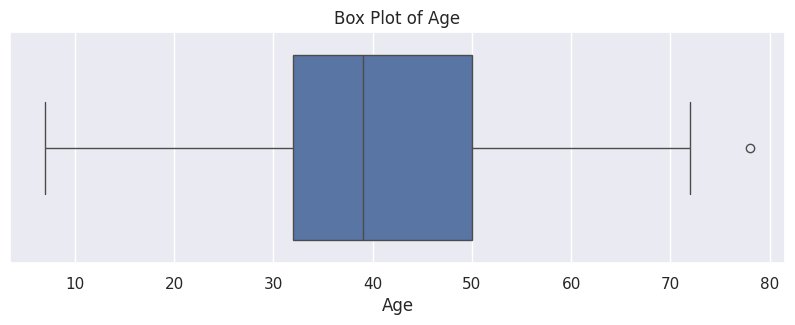

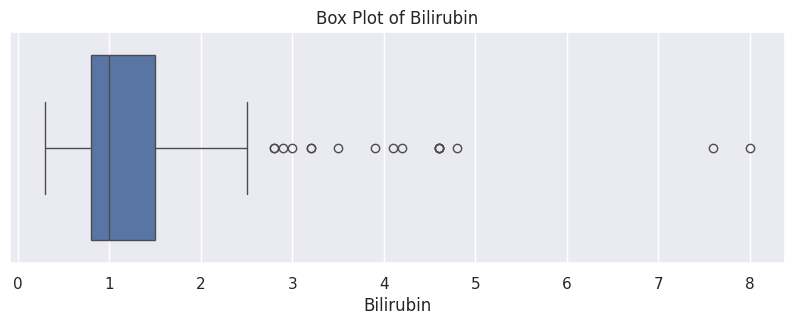

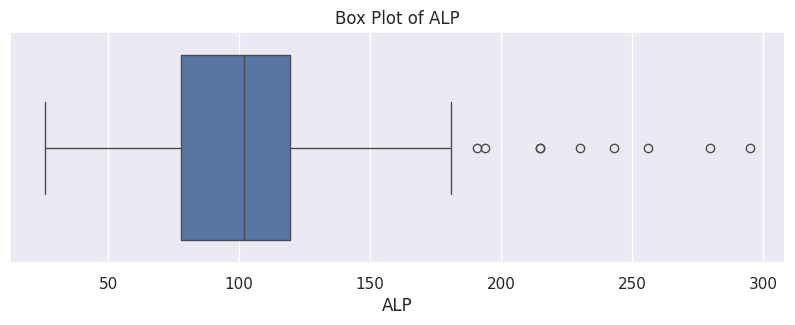

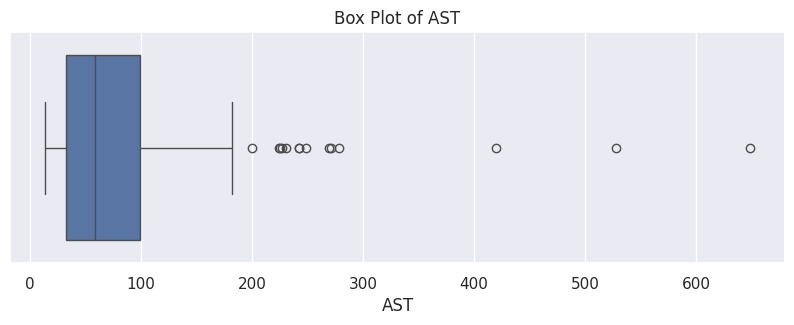

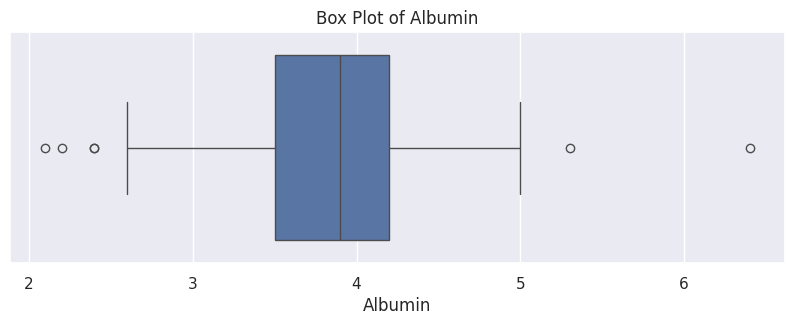

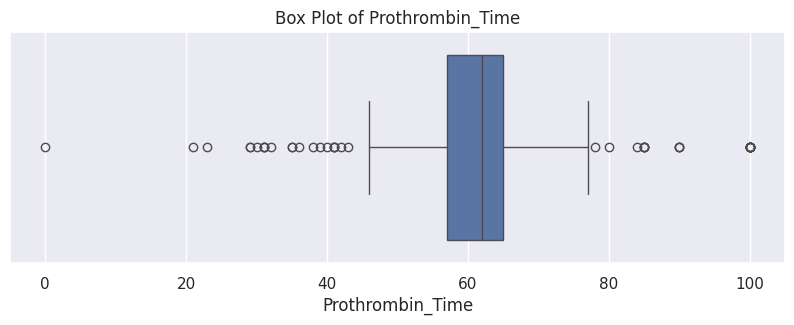

In [15]:

features= ['Age','Bilirubin','ALP','AST','Albumin','Prothrombin_Time']

for feature in features:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=X[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

*  z-scores

In [16]:
features = ['Age','Bilirubin','ALP','AST','Albumin','Prothrombin_Time']

for feature in features:
    z_scores = np.abs((X[feature] - X[feature].mean()) / X[feature].std())
    outliers = X[(z_scores > 3)]
    print(f"\nOutliers in {feature}:")
    print(outliers)


Outliers in Age:
Empty DataFrame
Columns: [Age, Sex, Hepatomegaly, Liver_Firmness, Splenomegaly, Ascites, Varices, Bilirubin, ALP, AST, Albumin, Prothrombin_Time, Histology]
Index: []

Outliers in Bilirubin:
     Age  Sex  Hepatomegaly  Liver_Firmness  Splenomegaly  Ascites  Varices  \
131   31    1             2               2             1        2        2   
150   46    1             2               2             2        1        1   

     Bilirubin  ALP  AST  Albumin  Prothrombin_Time  Histology  
131        8.0  105  101      2.2                62          2  
150        7.6  105  242      3.3                50          2  

Outliers in ALP:
     Age  Sex  Hepatomegaly  Liver_Firmness  Splenomegaly  Ascites  Varices  \
30    39    1             2               1             2        2        2   
110    7    1             2               1             1        2        2   
140   36    1             1               1             2        2        1   

     Bilirubin  ALP  AS

* ajusting outliers

In [17]:
from scipy.stats.mstats import winsorize
X['Bilirubin'] = winsorize(X['Bilirubin'], limits=[0, 0.05])
X['AST'] = winsorize(X['AST'], limits=[0, 0.05])
X['ALP'] = winsorize(X['ALP'], limits=[0, 0.05])
X['Albumin'] = winsorize(X['Albumin'], limits=[0, 0.05])
X['Prothrombin_Time'] = winsorize(X['Prothrombin_Time'], limits=[0, 0.05])

# Visualizing Data

* Scatter plots

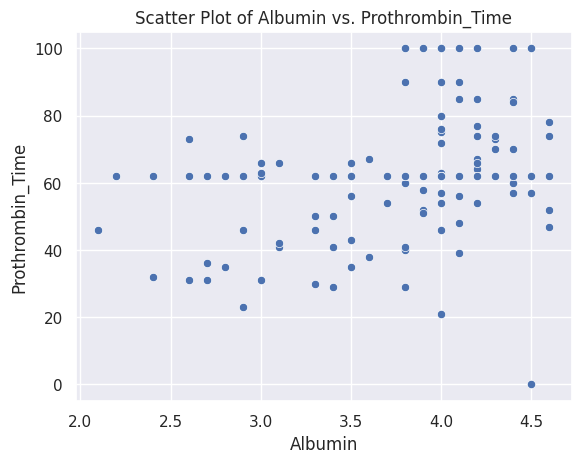

In [18]:
sns.scatterplot(x='Albumin', y='Prothrombin_Time', data=X)
plt.title('Scatter Plot of Albumin vs. Prothrombin_Time')
plt.xlabel('Albumin')
plt.ylabel('Prothrombin_Time')
plt.show()

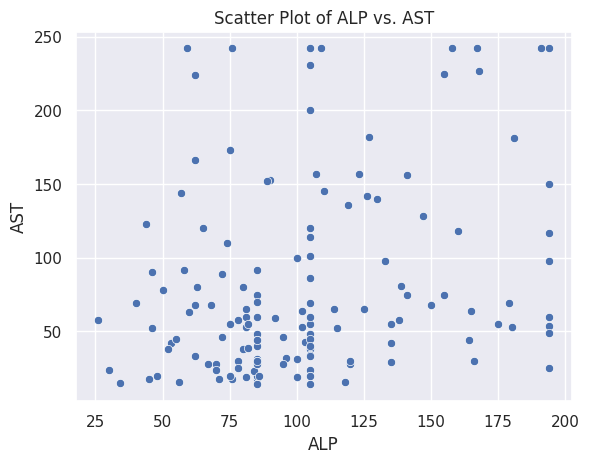

In [20]:
sns.scatterplot(x='ALP', y='AST', data=X)
plt.title('Scatter Plot of ALP vs. AST')
plt.xlabel('ALP')
plt.ylabel('AST')
plt.show()

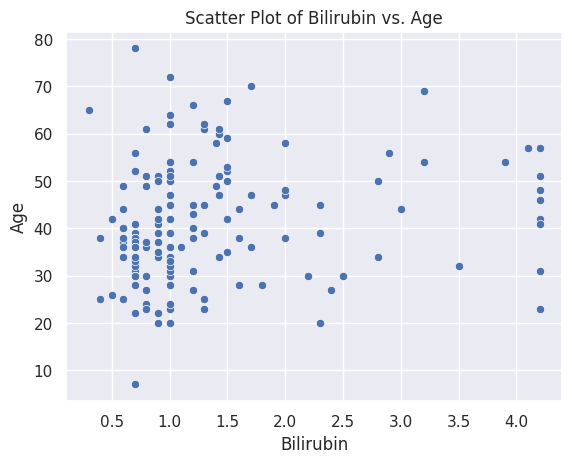

In [21]:
sns.scatterplot(x='Bilirubin', y='Age', data=X)
plt.title('Scatter Plot of Bilirubin vs. Age')
plt.xlabel('Bilirubin')
plt.ylabel('Age')
plt.show()

* Histograms

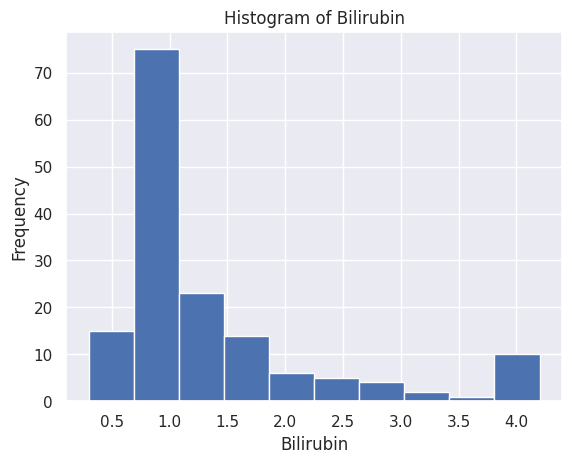

In [22]:
X['Bilirubin'].hist()
plt.title('Histogram of Bilirubin')
plt.xlabel('Bilirubin')
plt.ylabel('Frequency')
plt.show()

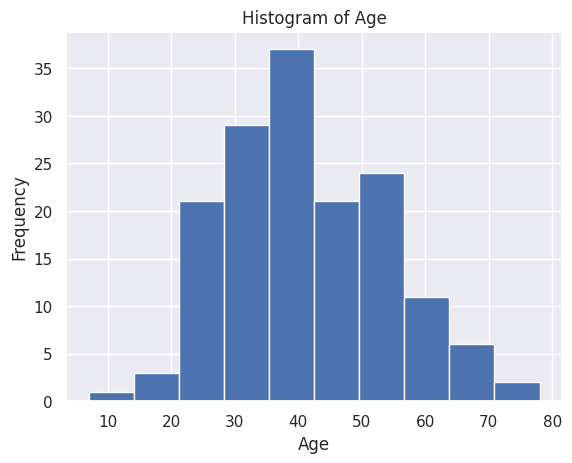

In [23]:
X['Age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

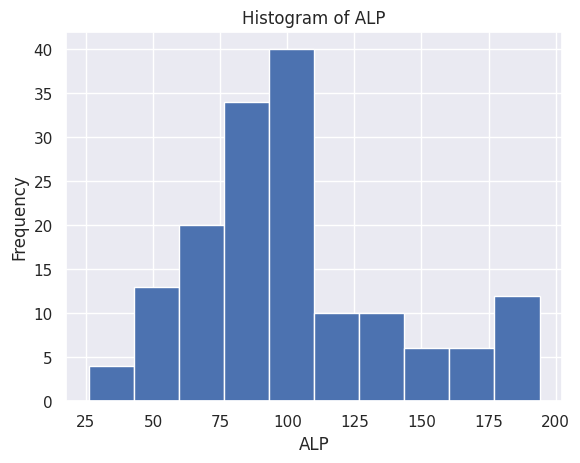

In [24]:
X['ALP'].hist()
plt.title('Histogram of ALP')
plt.xlabel('ALP')
plt.ylabel('Frequency')
plt.show()

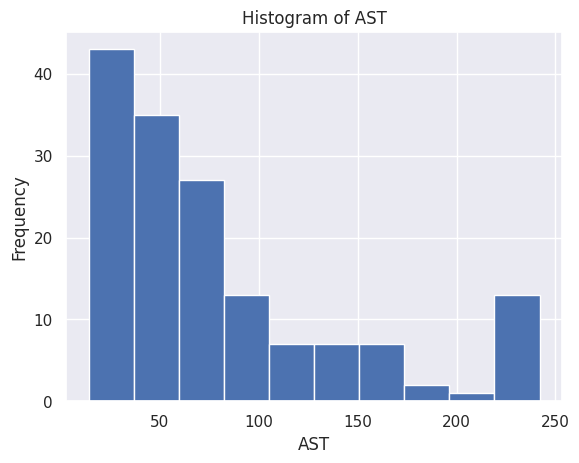

In [25]:
X['AST'].hist()
plt.title('Histogram of AST')
plt.xlabel('AST')
plt.ylabel('Frequency')
plt.show()

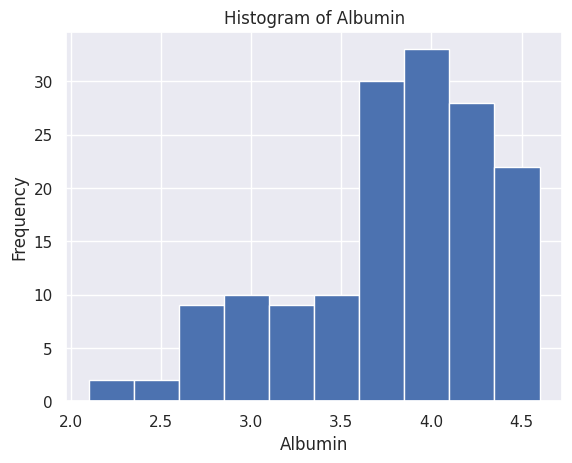

In [26]:
X['Albumin'].hist()
plt.title('Histogram of Albumin')
plt.xlabel('Albumin')
plt.ylabel('Frequency')
plt.show()

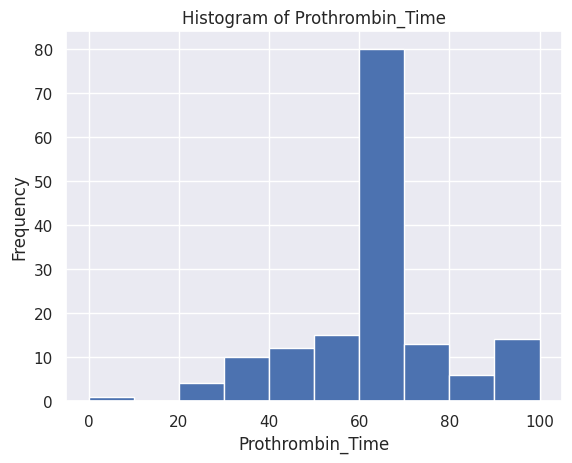

In [27]:
X['Prothrombin_Time'].hist()
plt.title('Histogram of Prothrombin_Time')
plt.xlabel('Prothrombin_Time')
plt.ylabel('Frequency')
plt.show()

* box plots

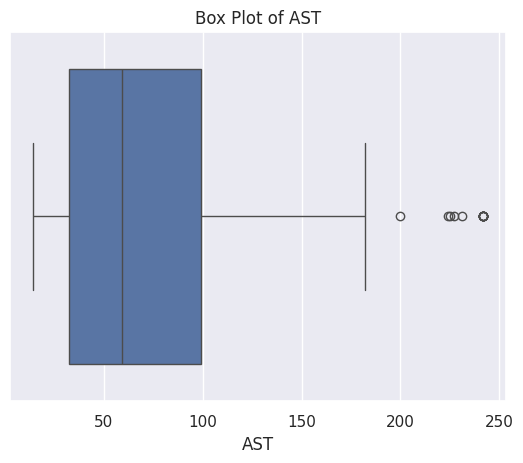

In [28]:
sns.boxplot(x=X['AST'])
plt.title('Box Plot of AST')
plt.xlabel('AST')
plt.show()

# Analyzing Correlations

* generate a correlation matrix

In [31]:
macierz = X.corr()
print(macierz)

                       Age       Sex  Hepatomegaly  Liver_Firmness  \
Age               1.000000  0.008126     -0.089629       -0.092001   
Sex               0.008126  1.000000     -0.081830       -0.078642   
Hepatomegaly     -0.089629 -0.081830      1.000000        0.479779   
Liver_Firmness   -0.092001 -0.078642      0.479779        1.000000   
Splenomegaly     -0.061277 -0.048478      0.095959        0.180607   
Ascites          -0.055314  0.130587     -0.116465        0.010196   
Varices          -0.039229  0.056792     -0.049453        0.208047   
Bilirubin         0.162680 -0.048841     -0.017784       -0.085869   
ALP               0.044721  0.088524     -0.112827       -0.312235   
AST               0.046736 -0.050909      0.027031       -0.156618   
Albumin          -0.240306  0.005484     -0.082420        0.162545   
Prothrombin_Time -0.153383 -0.009475     -0.071745        0.027025   
Histology         0.170780 -0.137450     -0.060262       -0.157118   

                  S

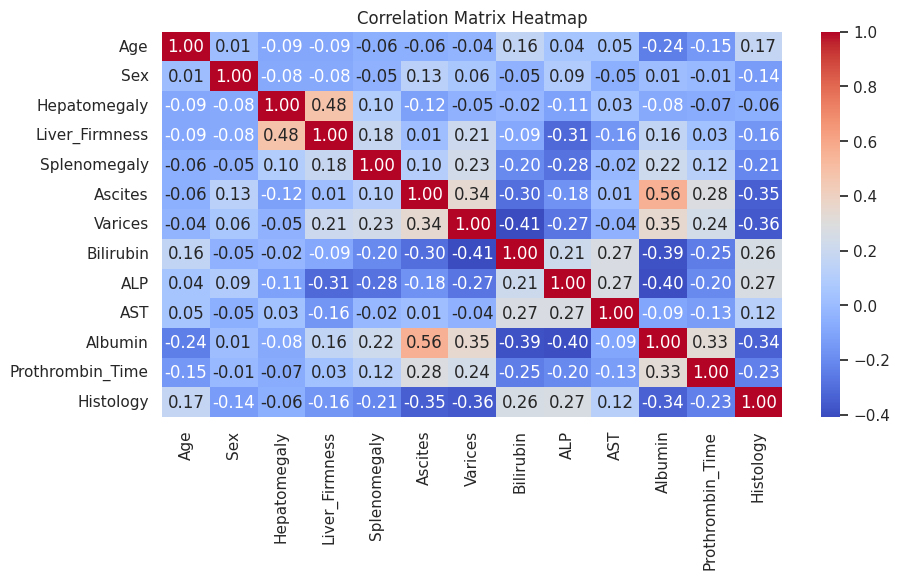

In [34]:
plt.figure(figsize=(10, 5))
sns.heatmap(macierz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
X.head(50)

,Age,Hepatomegaly,Liver_Firmness,Splenomegaly,Ascites,Varices,Bilirubin,ALP,AST,Albumin,Prothrombin_Time,Histology
0,30,1,2,2,2,2,1.00,85,18,4.0,62,1
1,50,1,2,2,2,2,0.90,135,42,3.5,62,1
2,78,2,2,2,2,2,0.70,96,32,4.0,62,1
3,31,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,2,2,2,2,2,1.00,105,200,4.0,62,1
5,34,2,2,2,2,2,0.90,95,28,4.0,75,1
6,51,2,2,1,2,2,1.43,105,86,3.8,62,1
7,23,2,2,2,2,2,1.00,105,86,3.8,62,1
8,39,2,1,2,2,2,0.70,105,48,4.4,62,1
9,30,2,2,2,2,2,1.00,105,120,3.9,62,1
